## Mean–Variance Analysis

Mean–Variance Analysis

Industry_Portfolios.xlsx contains monthly nominal (net) returns for ten industry portfolios, expressed in percent. These returns cover the ten-year period from Jan 2004 through Dec 2013.

Estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios. Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios. Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios, with expected return on the vertical axis and standard deviation of return on the horizontal axis. This plot should cover the range from 0% to 2%, in increments of 0.1% (or less), on the vertical axis. Briefly explain the economic significance and relevance of the minimum-variance frontier to an investor.

Now suppose that the risk-free rate is 0.13% per month. Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier generated by the ten industry portfolios. Briefly explain the economic significance and relevance of the efficient frontier to an investor.

The two frontiers will intersect at single point: the tangency portfolio. Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios. Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_excel(r'Industry_Portfolios.xlsx',index_col=0, parse_dates=True)

### Estimate the vector of mean returns and the covariance matrix of returns for the ten industry portfolios. Create a table showing the mean returns and standard deviation of returns for the ten industry portfolios.

In [32]:
mean = data.mean()
std = data.std()
cov = data.cov()
mean_std = pd.DataFrame([mean,std],index=['mean','standard deviation'])
print(mean_std.shape)
mean_std

(2, 10)


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
mean,0.902833,0.733333,1.012833,1.231167,0.766250,0.881417,0.916333,0.783833,0.907167,0.489083
standard deviation,3.345657,8.361852,5.310270,6.081524,5.381191,4.448284,4.093786,3.787172,3.701763,5.582452


### Plot the minimum-variance frontier (without the riskless asset) generated by the ten industry portfolios, with expected return on the vertical axis and standard deviation of return on the horizontal axis. This plot should cover the range from 0% to 2%, in increments of 0.1% (or less), on the vertical axis.

In [36]:
#Minimum-Variance Frontier without riskless assets
ind_return=np.array(mean_std.loc['mean']) 
ind_return

array([0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625   ,
       0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333])

In [37]:
e_t=np.array([1]*10)
e_t

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
e=e_t.T
e

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
v=np.array(cov) 
v

array([[11.19342216, 18.44966611, 14.10490703, 10.5313412 , 12.92294937,
        11.96807831, 10.17083232,  9.95311174,  7.86665347, 14.4384085 ],
       [18.44966611, 69.92057703, 39.1780972 , 27.0197944 , 35.4666521 ,
        27.49054314, 27.44473081, 16.82400308, 12.74613641, 39.36198711],
       [14.10490703, 39.1780972 , 28.19897006, 23.14537986, 24.61873929,
        19.55014973, 17.62286678, 13.59644703, 11.4406123 , 26.31342279],
       [10.5313412 , 27.0197944 , 23.14537986, 36.98493308, 19.26727584,
        15.36681682, 11.29780011,  9.63032658, 14.02716804, 18.32046915],
       [12.92294937, 35.4666521 , 24.61873929, 19.26727584, 28.95722027,
        18.70827342, 17.83711471, 13.25406408, 10.30418676, 23.85547048],
       [11.96807831, 27.49054314, 19.55014973, 15.36681682, 18.70827342,
        19.78722739, 14.16935566, 11.50659873, 10.99159564, 19.61083576],
       [10.17083232, 27.44473081, 17.62286678, 11.29780011, 17.83711471,
        14.16935566, 16.75908392, 10.17884947

In [40]:
v_inv=np.linalg.inv(v) #Compute the (multiplicative) inverse of a matrix.

In [41]:
delta=(e_t)@v_inv@e  # here @ is used for matrix multiplication.
zeta=(ind_return.T)@v_inv@ind_return
alpha=(ind_return.T)@v_inv@e

In [42]:
alpha

0.137943238699319

In [43]:
zeta

0.19640858464482278

In [44]:
delta

0.1373875973567117

In [45]:
rmv=alpha/delta
rmv

1.0040443340832625

In [51]:
Rp_1=np.linspace(0,rmv,100) #Lower Half Min-var Frontier
Sp_1=np.sqrt(1/delta+delta/(zeta*delta-alpha**2)*(Rp_1-alpha/delta)**2)
Rp_2=np.linspace(rmv,2,100) #Upper Half Min-var Frontier
Sp_2=np.sqrt(1/delta+delta/(zeta*delta-alpha**2)*(Rp_2-alpha/delta)**2)

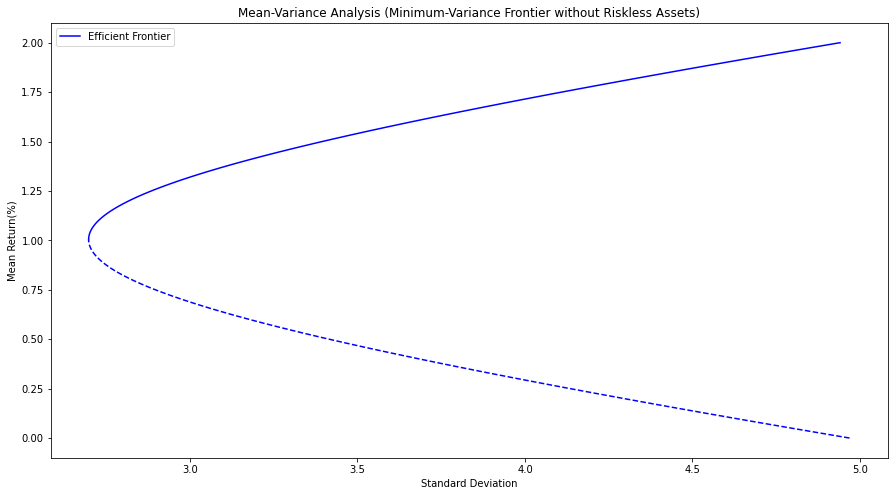

In [52]:
#Plot minimum-Variance Frontier without riskless assets

fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Sp_1,Rp_1,'b--')
plt.plot(Sp_2,Rp_2,'b-',label = 'Efficient Frontier')

plt.legend()
plt.title('Mean-Variance Analysis (Minimum-Variance Frontier without Riskless Assets)')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return(%)')
plt.show()

### Now suppose that the risk-free rate is 0.13% per month. Plot the efficient frontier (with the riskless asset) on the same plot as the minimum-variance frontier generated by the ten industry portfolios. Briefly explain the economic significance and relevance of the efficient frontier to an investor.

In [57]:
#Minimum-Variance Frontier with riskless assets
Rf=0.13
Rp_f=np.linspace(Rf,2,100)
Sp_f=(Rp_f-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)**0.5
Sp_f

array([0.        , 0.046805  , 0.09361001, 0.14041501, 0.18722001,
       0.23402501, 0.28083002, 0.32763502, 0.37444002, 0.42124502,
       0.46805003, 0.51485503, 0.56166003, 0.60846503, 0.65527004,
       0.70207504, 0.74888004, 0.79568504, 0.84249005, 0.88929505,
       0.93610005, 0.98290505, 1.02971006, 1.07651506, 1.12332006,
       1.17012506, 1.21693007, 1.26373507, 1.31054007, 1.35734507,
       1.40415008, 1.45095508, 1.49776008, 1.54456508, 1.59137009,
       1.63817509, 1.68498009, 1.73178509, 1.7785901 , 1.8253951 ,
       1.8722001 , 1.9190051 , 1.96581011, 2.01261511, 2.05942011,
       2.10622511, 2.15303012, 2.19983512, 2.24664012, 2.29344512,
       2.34025013, 2.38705513, 2.43386013, 2.48066513, 2.52747014,
       2.57427514, 2.62108014, 2.66788514, 2.71469015, 2.76149515,
       2.80830015, 2.85510515, 2.90191016, 2.94871516, 2.99552016,
       3.04232516, 3.08913017, 3.13593517, 3.18274017, 3.22954517,
       3.27635018, 3.32315518, 3.36996018, 3.41676518, 3.46357

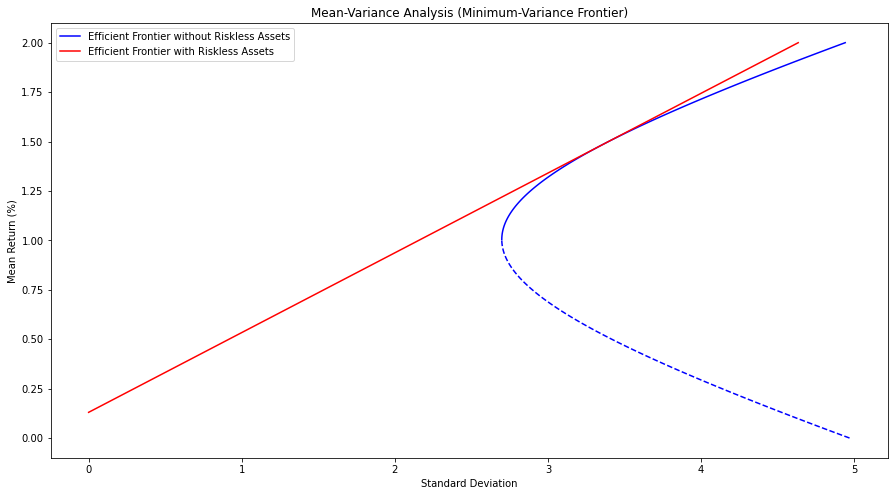

In [59]:
#plot

fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Sp_1,Rp_1,'b--')
plt.plot(Sp_2,Rp_2,'b-',label = 'Efficient Frontier without Riskless Assets')
plt.plot(Sp_f,Rp_f,'r-',label='Efficient Frontier with Riskless Assets')

plt.title('Mean-Variance Analysis (Minimum-Variance Frontier)')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return (%)')
plt.legend()
plt.show()

### The two frontiers will intersect at single point: the tangency portfolio. Calculate the Sharpe ratio for the tangency portfolio, and also the tangency portfolio weights for the ten industry portfolios. Briefly explain the economic significance and relevance of the tangency portfolio to an investor.

In [60]:
#Tangency portfolio and weights
R_tg=(alpha*Rf-zeta)/(delta*Rf-alpha)
R_tg

1.4862735358446901

In [61]:
Sp_tg=-((zeta-2*alpha*Rf+delta*(Rf**2))**0.5)/(delta*(Rf-rmv)) #pg 23 formula
Sp_tg

3.360726330566364

In [62]:
# Sharpe Ratio for Tangency portfolio
Sharpe_Ratio=(R_tg-Rf)/Sp_tg
Sharpe_Ratio

0.4035655993495088

In [63]:
# weights of Tangency portfolio
lambda_tg=(R_tg-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)
weights=[lambda_tg*v_inv@(ind_return-Rf*e)]
weights

[array([ 0.56797218, -0.2140726 ,  0.71410511,  0.10408719, -0.36343817,
        -0.09546326,  0.99164683,  0.0755702 ,  0.13264333, -0.91305081])]

In [64]:
w=pd.DataFrame(weights,columns=cov.index,index=['Weight'])
w

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weight,0.567972,-0.214073,0.714105,0.104087,-0.363438,-0.095463,0.991647,0.07557,0.132643,-0.913051


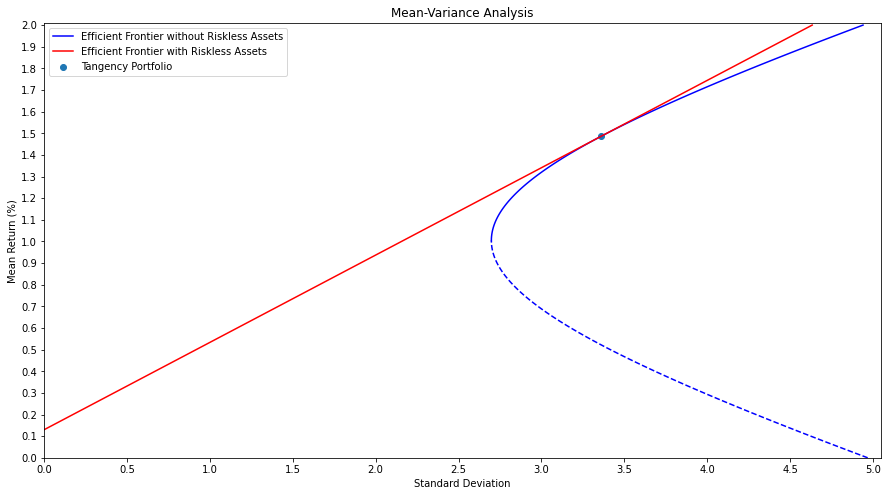

In [68]:
#plot

fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Sp_1,Rp_1,'b--')
plt.plot(Sp_2,Rp_2,'b-',label = 'Efficient Frontier without Riskless Assets')
plt.plot(Sp_f,Rp_f,'r-',label='Efficient Frontier with Riskless Assets')
plt.scatter(Sp_tg,R_tg,label='Tangency Portfolio')
my_x_ticks = np.arange(0,5.05, 0.5)
my_y_ticks = np.arange(0, 2.1, 0.1)
plt.yticks(my_y_ticks)
plt.xticks(my_x_ticks)
plt.xlim((0, 5.05))
plt.ylim((0, 2.01))
plt.legend()
plt.title('Mean-Variance Analysis')
plt.xlabel('Standard Deviation')
plt.ylabel('Mean Return (%)')
plt.show()

### Economic significance:

Minimum-variance frontier consists of portfolios with least risk for specified mean return, so no portfolios exist to the left of this frontier.

Efficient frontier consists of portfolios with highest mean return for specified level of risk, so risk-averse investor must invest in portfolio on this frontier in order to maximise expected utility (of wealth).

Tangency portfolio has the highest possible Sharpe ratio.

Full -script